# Project-2 (Victims of Rape)

In [1]:
#Let's import necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

print("Successfully imported Libraries")

Successfully imported Libraries


In [2]:
#Let's load the data set
rape=pd.read_csv('20_Victims_of_rape.csv')

In [3]:
rape.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

In [4]:
#Let's check the shape of our data set
rape.shape

(1050, 11)

In [5]:
rape.Area_Name.value_counts()

Assam                        30
Sikkim                       30
Odisha                       30
Andaman & Nicobar Islands    30
Manipur                      30
Kerala                       30
Puducherry                   30
Bihar                        30
Arunachal Pradesh            30
Tripura                      30
Lakshadweep                  30
Uttar Pradesh                30
Andhra Pradesh               30
Punjab                       30
Himachal Pradesh             30
Tamil Nadu                   30
Nagaland                     30
Meghalaya                    30
Chandigarh                   30
Rajasthan                    30
Goa                          30
Gujarat                      30
Jharkhand                    30
Delhi                        30
West Bengal                  30
Karnataka                    30
Madhya Pradesh               30
Uttarakhand                  30
Daman & Diu                  30
Maharashtra                  30
Haryana                      30
Jammu & 

In [6]:
#Let's check for the missing values
rape.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

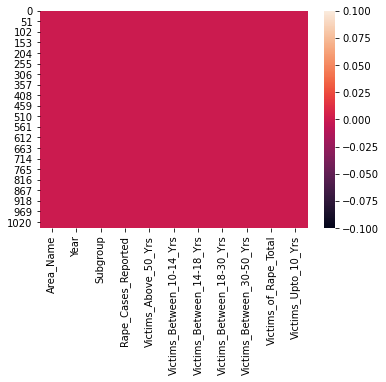

In [7]:
#Let's ceck the heat map for better visual
sns.heatmap(rape.isnull())
plt.show()

In [8]:
#Let's begin with our EDA
rape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [9]:
# let's clean the data a bit
# we don't need the Total Rape Victims subgroup (we can do that in Pandas), let's remove it
rape = rape[rape['Subgroup'] != 'Total Rape Victims']

# let's check if the all the rape cases are reported
rape[rape['Victims_of_Rape_Total'] != rape['Rape_Cases_Reported']].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67


#### From the above output we can see that the all the rape cases are not reorted

In [10]:
#Let's store the number of unreported rape cases in another column
rape['Unreported_Cases'] = rape['Victims_of_Rape_Total'] - rape['Rape_Cases_Reported']

# let's taka a look at the new dataframe
rape[rape['Unreported_Cases'] > 0].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0,1
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45,2
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31,4
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49,8
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67,3


#### We have created a new column and stored the value of rape cases which were not reported

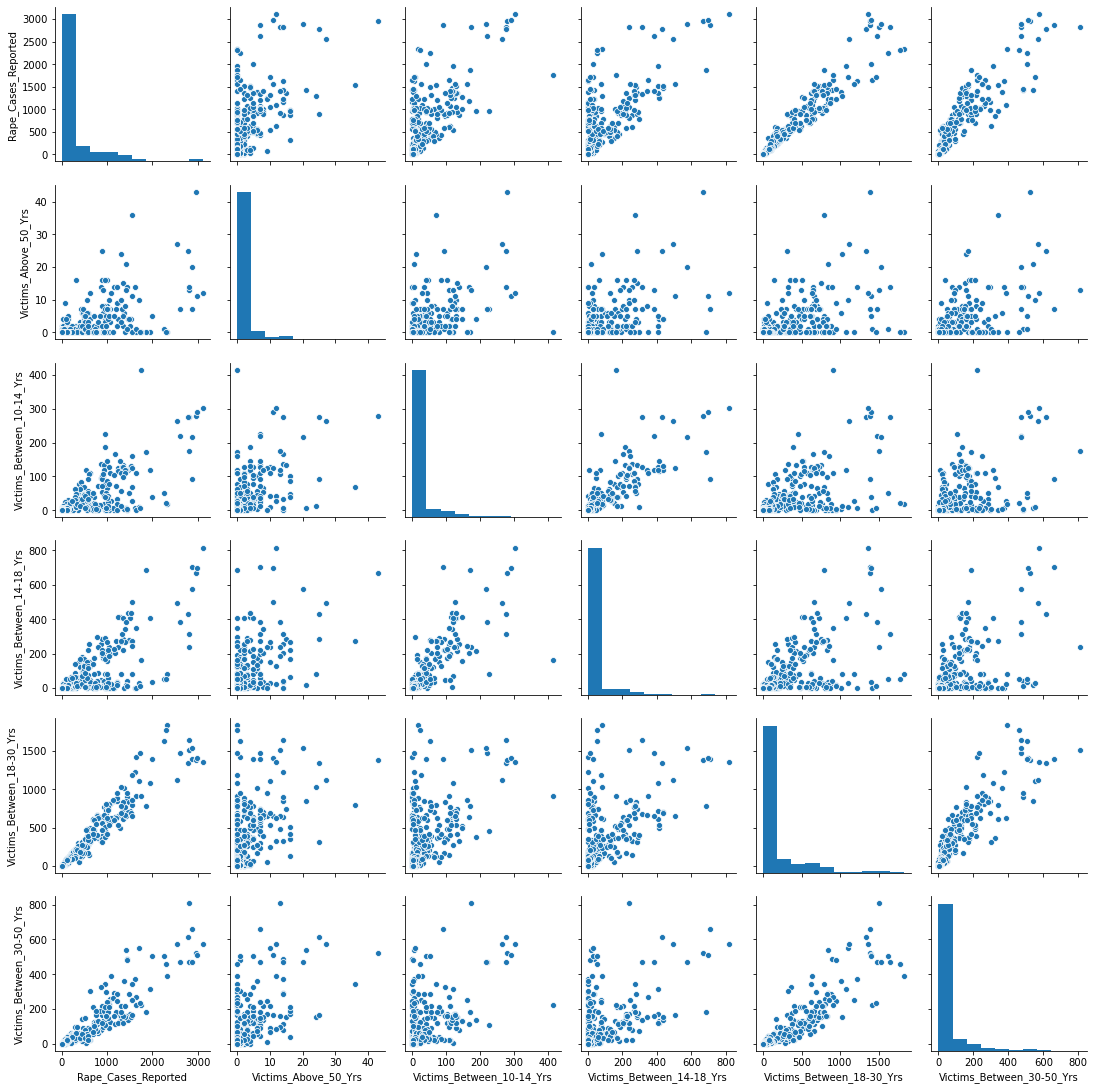

In [11]:
sns.pairplot(rape, vars=["Rape_Cases_Reported", "Victims_Above_50_Yrs","Victims_Between_10-14_Yrs", "Victims_Between_14-18_Yrs","Victims_Between_18-30_Yrs","Victims_Between_30-50_Yrs"]);

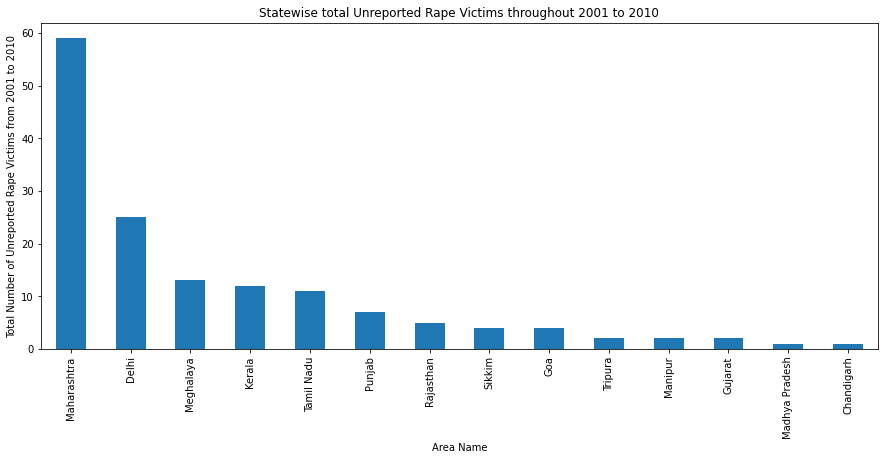

In [12]:
# let's plot the unreported rape cases sorted by states throughout 2001 to 2010
unreported_victims_by_state = rape.groupby('Area_Name').sum()
unreported_victims_by_state.drop('Year', axis = 1, inplace = True)

# let's finally plot it
plt.subplots(figsize = (15, 6))
ct = unreported_victims_by_state[unreported_victims_by_state['Unreported_Cases'] 
                                 > 0]['Unreported_Cases'].sort_values(ascending = False)
#print(ct)
ax = ct.plot.bar()
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Unreported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Unreported Rape Victims throughout 2001 to 2010')
plt.show()

#### From the above outout we can observe Maharastra has the highest numbers of unreported cases, followed by Delhi, Haryana, Kerla, Tamil Nadu and so on

In [13]:
# let's take some general data and plot some simple charts
rape_victims_by_state = rape.groupby('Area_Name').sum()
rape_victims_by_state.drop('Year', axis = 1, inplace = True)
print('Total Rape Victims = ' ,rape_victims_by_state['Rape_Cases_Reported'].sum())
rape_victims_by_state.sort_values(by = 'Rape_Cases_Reported', ascending = False).head()

Total Rape Victims =  190008


,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
Area_Name,,,,,,,,,
Madhya Pradesh,29256,181,2499,5554,14532,5783,29257,708,1
West Bengal,16378,10,156,273,12586,3290,16378,63,0
Uttar Pradesh,15053,12,1424,3092,8076,2086,15053,363,0
Maharashtra,14446,63,1305,4152,6560,1485,14505,940,59
Assam,12762,95,153,409,8507,3552,12762,46,0


#### From the above output we can ibserve the bumber of rape victims statewise based on their age

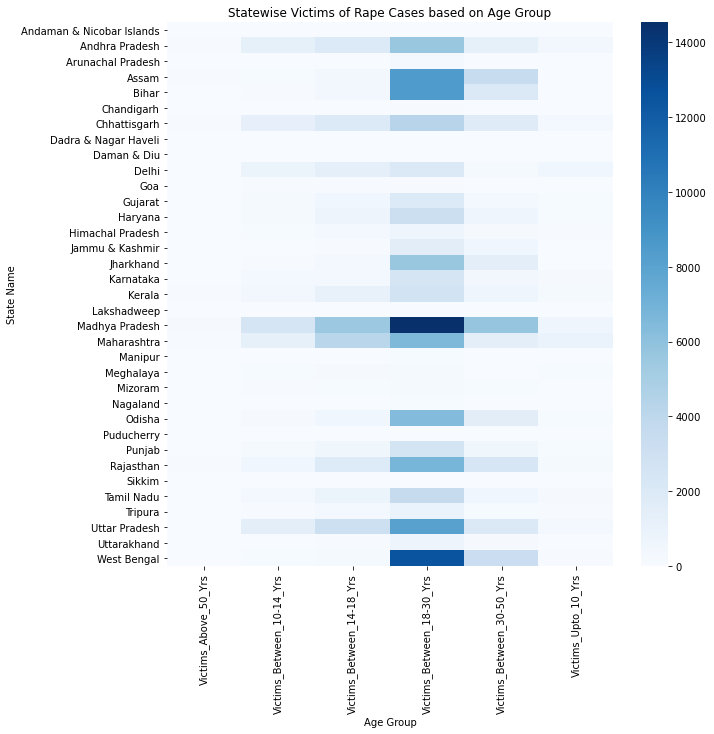

In [14]:
# let's make a heatmap map
rape_victims_heatmap = rape_victims_by_state.drop(['Rape_Cases_Reported', 
                                                   'Victims_of_Rape_Total', 
                                                   'Unreported_Cases'], axis = 1)
plt.subplots(figsize = (10, 10))
ax = sns.heatmap(rape_victims_heatmap, cmap="Blues")
ax.set_xlabel('Age Group')
ax.set_ylabel('State Name')
ax.set_title('Statewise Victims of Rape Cases based on Age Group')
plt.show()

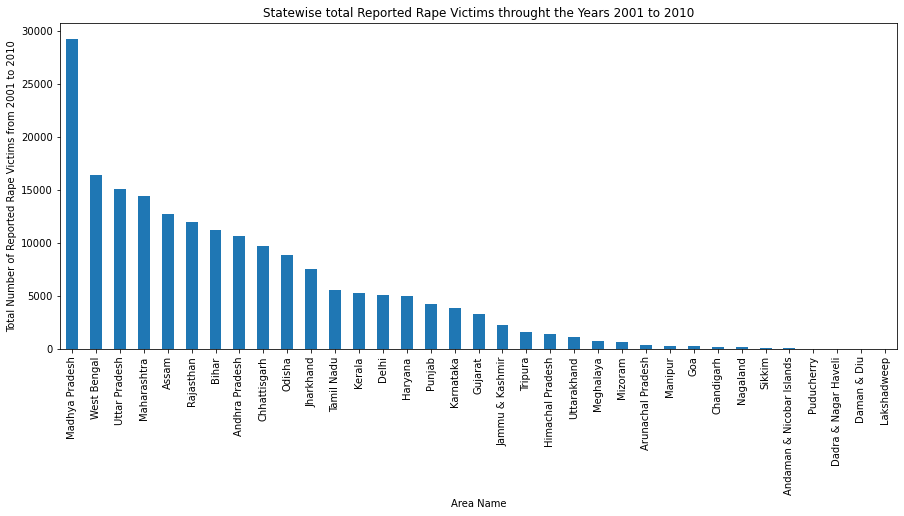

Area_Name
Madhya Pradesh               29256
West Bengal                  16378
Uttar Pradesh                15053
Maharashtra                  14446
Assam                        12762
Rajasthan                    11949
Bihar                        11263
Andhra Pradesh               10696
Chhattisgarh                  9751
Odisha                        8860
Jharkhand                     7563
Tamil Nadu                    5538
Kerala                        5296
Delhi                         5146
Haryana                       5009
Punjab                        4300
Karnataka                     3917
Gujarat                       3337
Jammu & Kashmir               2230
Tripura                       1624
Himachal Pradesh              1453
Uttarakhand                   1101
Meghalaya                      726
Mizoram                        646
Arunachal Pradesh              412
Manipur                        271
Goa                            266
Chandigarh                     227
Nagaland  

In [15]:
# let's first plot only the total number of rape cases reported in each state
plt.subplots(figsize = (15, 6))
ct = rape_victims_by_state['Rape_Cases_Reported'].sort_values(ascending = False)
#print(ct)
ax = ct.plot.bar()
#ax = sns.barplot(x = rape_victims_by_state.index, y = rape_victims_by_state['Rape_Cases_Reported'])
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Reported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Reported Rape Victims throught the Years 2001 to 2010')
plt.show()
print(ct)

#### Fromt the above output we can see that the Madhya Pradesh has the maximum number of rape victims, followed by MAdhya Pradesh, West Bengal, Uttar Pradesh and so on

In [16]:
#Let's explore the data of Madhtya Pradesh first
mp_rape_victims = rape[rape['Area_Name'] == 'Madhya Pradesh']

# let's have a look in the data
mp_rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
571,Madhya Pradesh,2001,Victims of Incest Rape,301,0,39,66,130,56,301,10,0
572,Madhya Pradesh,2001,Victims of Other Rape,2550,27,265,491,1120,571,2550,76,0
574,Madhya Pradesh,2002,Victims of Incest Rape,72,1,11,16,37,4,72,3,0
575,Madhya Pradesh,2002,Victims of Other Rape,2819,13,174,236,1512,807,2819,77,0
577,Madhya Pradesh,2003,Victims of Incest Rape,123,0,10,23,71,16,123,3,0


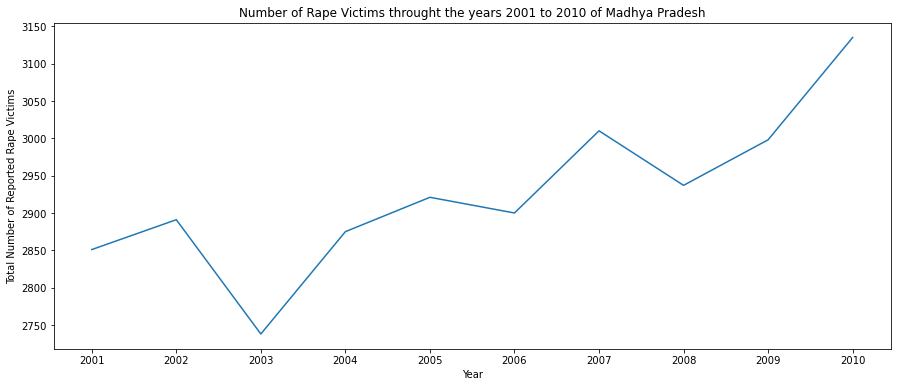

In [17]:
# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

# plotting the data
plt.subplots(figsize = (15, 6))
ax = mp_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims', 
       title = 'Number of Rape Victims throught the years 2001 to 2010 of Madhya Pradesh')
plt.show()

#### From the above graph we can see that the number of yearly rape cases drastically dropped in 2003 and the again incresed and by 2010 the number of yearly raped victims has rached the top peak by increasing ecery year with minor delcine in cases throughout the decade 

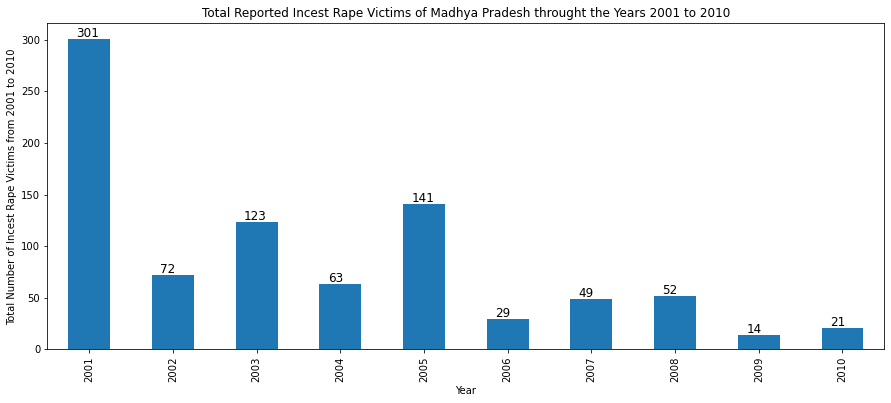

In [18]:
# let's first see the mp_rape_victims dataframe
#mp_rape_victims.head()

# plot the dataframe
mp_incest_rape_cases = mp_rape_victims[mp_rape_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = mp_incest_rape_cases.groupby('Year').sum()
ax = ct['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2),fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims of Madhya Pradesh throught the Years 2001 to 2010')
plt.show()

#### From the above graph we can the maximum nmber of rape cases reported was in 2001 the it keeps on incresaing and decrasing due to certain reasons. But in 2009 ony 14 number of rape cases reported however from the previous graps we have seen that the Madhya Pradesh ahs the maximum number of unreported cases.
We have to do more research for the cause of those unreported cases in MP

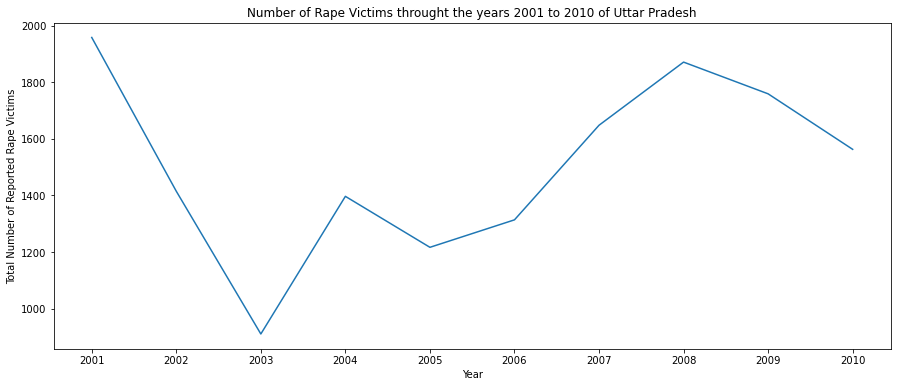

In [19]:
#Let's Explore for Uttar Pradesh
up_rape_victims = rape[rape['Area_Name'] == 'Uttar Pradesh']

# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
up_rape_victims_by_year = up_rape_victims.groupby('Year').sum()

# plotting the data
plt.subplots(figsize = (15, 6))
ax = up_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims',
       title = 'Number of Rape Victims throught the years 2001 to 2010 of Uttar Pradesh')
plt.show()

#### From the above graoh we can see there was a drastic decline in the rape cases from 2001 to 2003 then agaion it is increases and from again 2008 mid onwards it started declining

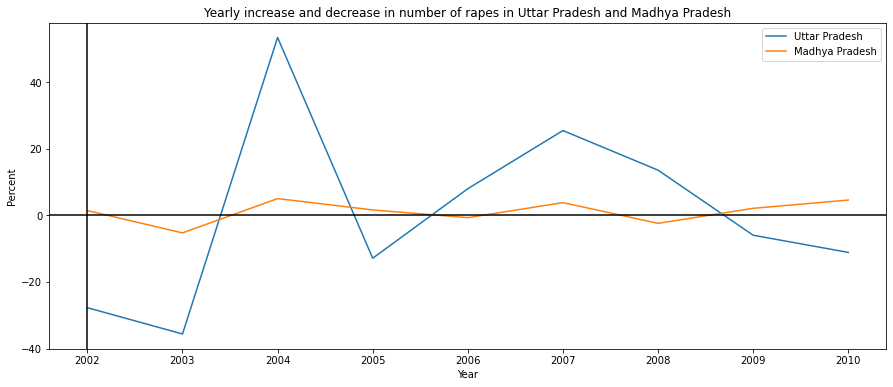

Overall Increase in number of rapes in Uttar Pradesh = -25.27 Percent
Overall Increase in number of rapes in Madhya Pradesh = 18.17 Percent


In [20]:
# let's calculate the percentage increase of number of rapes in Uttar Pradesh and compare 
# it with Madhya Pradesh
plt.subplots(figsize = (15, 6))
ax = (up_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(legend = True, 
                                                                              label = 'Uttar Pradesh')
(mp_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(ax = ax, legend = True, 
                                                                         label = 'Madhya Pradesh')
ax.set(xlabel = 'Year', ylabel = 'Percent', 
       title = 'Yearly increase and decrease in number of rapes in Uttar Pradesh and Madhya Pradesh')
ax.axhline(0, color = 'black')
ax.axvline(2002, color = 'black')
plt.show()
print('Overall Increase in number of rapes in Uttar Pradesh =', 
      '{0:.2f}'.format(((up_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - up_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /up_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')
print('Overall Increase in number of rapes in Madhya Pradesh =', 
      '{0:.2f}'.format(((mp_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - mp_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /up_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')

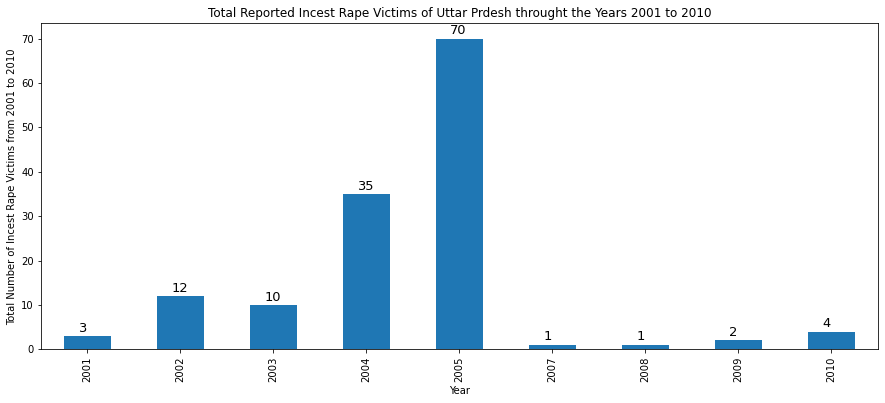

In [21]:
# incest rape cases in Uttar Pradesh
up_incest_rape_cases = up_rape_victims[up_rape_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = up_incest_rape_cases.groupby('Year').sum()
ax = ct[ct['Rape_Cases_Reported'] > 0]['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + .15, p.get_height()+1),fontsize=13)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims of Uttar Prdesh throught the Years 2001 to 2010')
plt.show()

#### Fromt the above graph we can see that the 2005 was the most horror ful year as 70 number of insest rape case happened in 2005 and after that it drastically decreased to 1 in 2007 and it ramians very minute throughout the decade

In [22]:
rape.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 1049
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  700 non-null    object
 1   Year                       700 non-null    int64 
 2   Subgroup                   700 non-null    object
 3   Rape_Cases_Reported        700 non-null    int64 
 4   Victims_Above_50_Yrs       700 non-null    int64 
 5   Victims_Between_10-14_Yrs  700 non-null    int64 
 6   Victims_Between_14-18_Yrs  700 non-null    int64 
 7   Victims_Between_18-30_Yrs  700 non-null    int64 
 8   Victims_Between_30-50_Yrs  700 non-null    int64 
 9   Victims_of_Rape_Total      700 non-null    int64 
 10  Victims_Upto_10_Yrs        700 non-null    int64 
 11  Unreported_Cases           700 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 91.1+ KB


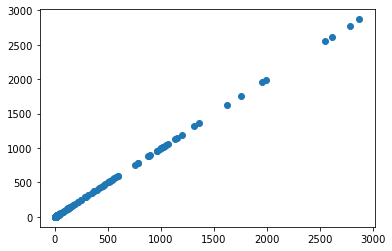

In [23]:
#Let's split the data into 'x' independent and 'y' dependent variables
x = rape.drop(columns=['Area_Name','Subgroup','Rape_Cases_Reported'],axis=1)
y = rape['Rape_Cases_Reported']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
predictions=lm.predict(x_test)
plt.scatter(y_test,predictions);

In [24]:
#Checking how well the predictions are
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.739443870213347e-13
MSE: 1.1611040856645815e-24
RMSE: 1.0775453984239279e-12


In [25]:
#Let' improve our model
#First let's scle our model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
#Using different models
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

classifiers = [
    SGDRegressor(max_iter=100000),
    LinearSVR(max_iter=100000),
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]

In [27]:
#Evaluating scores by cross-validation
from sklearn.model_selection import cross_val_score
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print("Mean: ", scores.mean())
    print("Std deviation: ", scores.std())
    
print("="*30)

SGDRegressor
Mean:  -0.0780368578255167
Std deviation:  0.09649678676604642
LinearSVR
Mean:  -24111.192322913426
Std deviation:  12714.511807976318
LinearRegression
Mean:  -5.647202398606701e-25
Std deviation:  7.640272284670976e-25
DecisionTreeRegressor
Mean:  -1201.687755102041
Std deviation:  2440.6887527927774
RandomForestRegressor
Mean:  -609.5147185714285
Std deviation:  826.9179918415878


In [28]:
#We will use Grid Search to get best settings(estimator) for Random Forest Regression
from sklearn.model_selection import GridSearchCV
#param_grid is for our settings lets see what fits the best
param_grid = [
    {'n_estimators': [3, 10, 30,50,100,200,300]},
      ]
rnd_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rnd_reg, param_grid, cv=10,scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'n_estimators': [3, 10, 30, 50, 100, 200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
grid_search.best_params_

{'n_estimators': 300}

In [30]:
#Predictions on best Parameters
best_reg = grid_search.best_estimator_
y_pred = best_reg.predict(x_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae=mean_absolute_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
print("Final MAE:",final_mae)
print("Final MSE:",final_mse)
print("Final RMSE:",final_rmse)

Final MAE: 6.535746031746033
Final MSE: 824.1973344973549
Final RMSE: 28.708837219527975


In [31]:
#Our Initial Predictions
print('Initial MAE:', metrics.mean_absolute_error(y_test, predictions))
print('Initial MSE:', metrics.mean_squared_error(y_test, predictions))
print('Initial RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Initial MAE: 7.739443870213347e-13
Initial MSE: 1.1611040856645815e-24
Initial RMSE: 1.0775453984239279e-12


In [32]:
#Our new model Performs much better 
print('Reduced MAE:',(metrics.mean_absolute_error(y_test, predictions))-final_mae)
print('Reduced MSE:',(metrics.mean_squared_error(y_test, predictions))-final_mse)
print('Reduced RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions))-final_rmse)

Reduced MAE: -6.535746031745259
Reduced MSE: -824.1973344973549
Reduced RMSE: -28.7088372195269


In [33]:
print("Our original model mean: ",rape['Rape_Cases_Reported'].mean())
print("Our proposed model mean: ",predictions.mean())

Our original model mean:  271.44
Our proposed model mean:  263.07142857142867


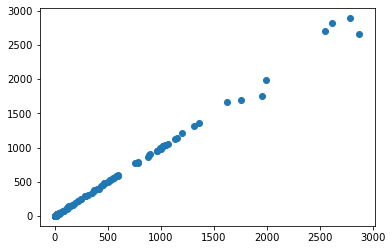

In [34]:
#lets make a scatter plot for our new model
plt.scatter(y_test,y_pred)

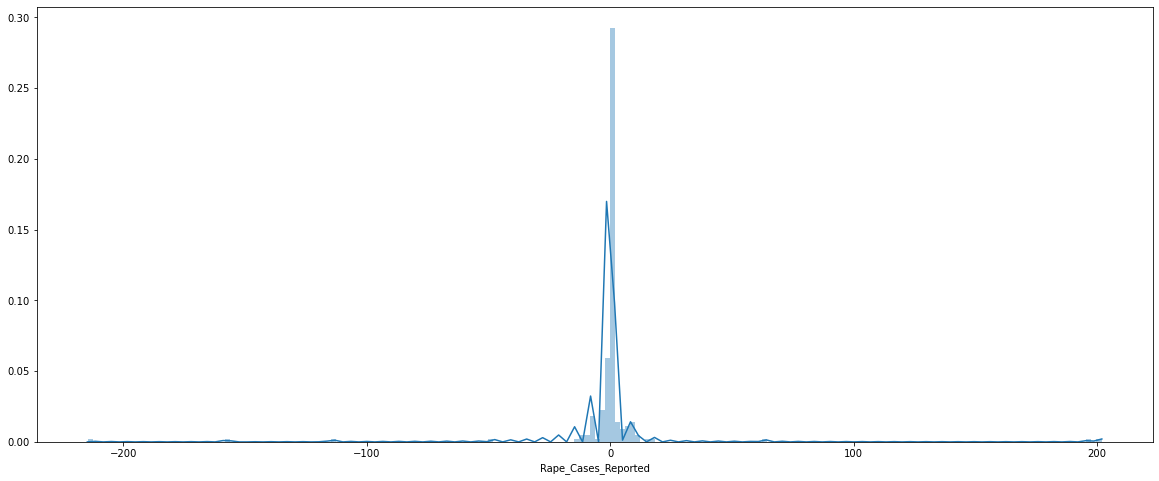

In [35]:
plt.figure(figsize=(20,8))
sns.distplot((y_test-y_pred),bins=200);